In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#data = pd.read_csv('../../datasets/Jobs/ds_job.csv')
data = pd.read_csv('ds_job.csv')

In [3]:
data.head()

,empleado_id,ciudad,indice_desarrollo_ciudad,genero,experiencia_relevante,universidad_matriculado,nivel_educacion,educacion,experiencia,tamano_compania,tipo_compania,ultimo_nuevo_trabajo,horas_formacion,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   empleado_id               19158 non-null  int64  
 1   ciudad                    19158 non-null  object 
 2   indice_desarrollo_ciudad  19158 non-null  float64
 3   genero                    14650 non-null  object 
 4   experiencia_relevante     19158 non-null  object 
 5   universidad_matriculado   18772 non-null  object 
 6   nivel_educacion           18698 non-null  object 
 7   educacion                 16345 non-null  object 
 8   experiencia               19093 non-null  object 
 9   tamano_compania           13220 non-null  object 
 10  tipo_compania             13018 non-null  object 
 11  ultimo_nuevo_trabajo      18735 non-null  object 
 12  horas_formacion           19158 non-null  int64  
 13  target                    19158 non-null  float64
dtypes: flo

In [5]:
data.describe()

,empleado_id,indice_desarrollo_ciudad,horas_formacion,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


En total vemos que tenemos un dataset con 19158 entradas y 14 columnas o features. De ellas, únicamente 4 son variables numéricas, siendo todas las demás categgóricas. habrá que hacer por tanto un buen esfuerzo en estudiar y transformar correctamente todas estas variables categóricas.

array([[<AxesSubplot:title={'center':'empleado_id'}>,
        <AxesSubplot:title={'center':'indice_desarrollo_ciudad'}>],
       [<AxesSubplot:title={'center':'horas_formacion'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

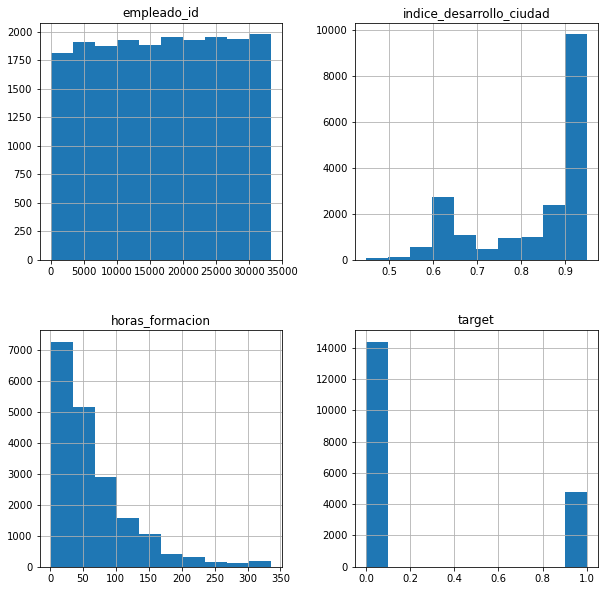

In [6]:
data.hist(figsize=(10,10))

In [7]:
np.unique(data.horas_formacion)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 170, 172, 174, 176, 178,
       180, 182, 184, 188, 190, 192, 194, 196, 198, 200, 202, 20

In [8]:
cols = [i for i in data if data[str(i)].dtype == 'O']
print(cols)

['ciudad', 'genero', 'experiencia_relevante', 'universidad_matriculado', 'nivel_educacion', 'educacion', 'experiencia', 'tamano_compania', 'tipo_compania', 'ultimo_nuevo_trabajo']


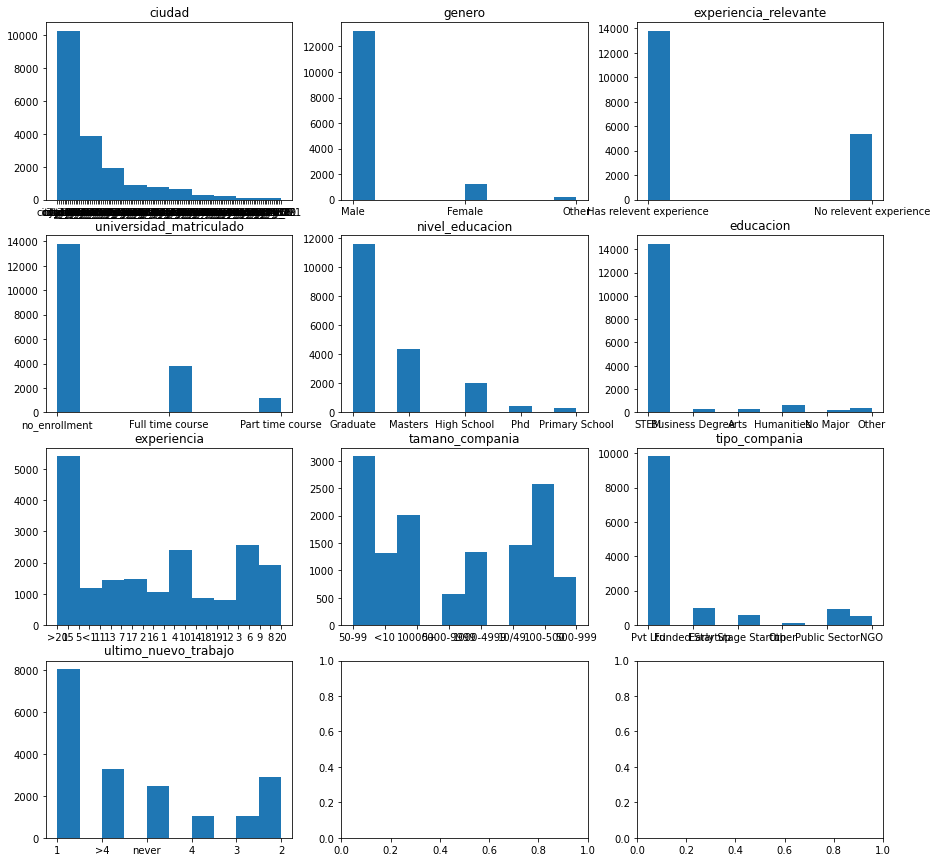

In [9]:
nrows=4
ncols=3
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, sharey=False, figsize=(15,15))
for i in range(4):
    for j in range(3):
        idx = (nrows-1)*i+j
        if idx < len(cols):
            ax[i, j].hist(data[cols[idx]].dropna())
            ax[i, j].set_title(cols[idx])
plt.show()

Medimos correlación entre las variables:

Obtenemos la matriz de correlación de las variables. Como casi todas son categóricas, empleamos el método empleado en https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [10]:
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [11]:
data1 = data.drop(columns=['empleado_id'])
n = data1.shape[1]
corr_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        corr_matrix[i, j] = cramers_v(data[data1.columns[i]], data[data1.columns[j]])

In [12]:
df = pd.DataFrame(corr_matrix, columns=data1.columns)

<AxesSubplot:>

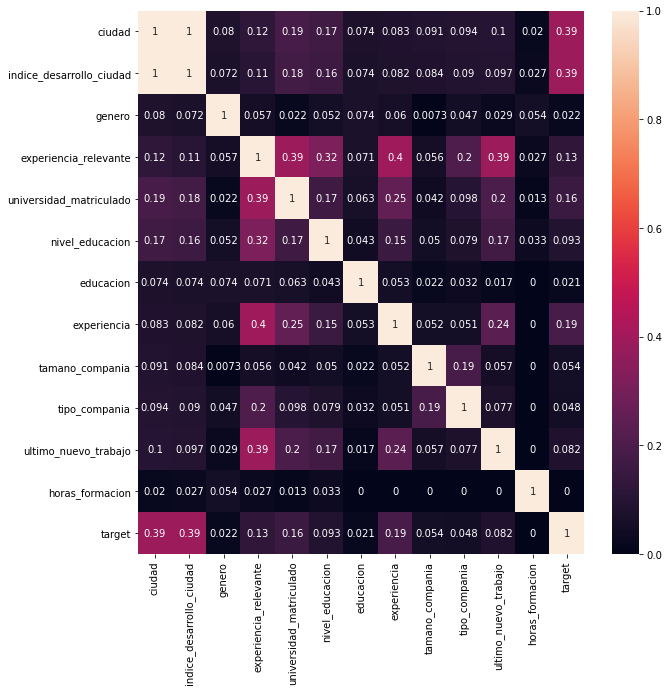

In [13]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df, vmin=0, vmax=1, annot=True, yticklabels=data1.columns, xticklabels=data1.columns)

In [14]:
cramers_v(data['target'], data['ciudad'])

0.3875153288684825

In [15]:
from collections import Counter
import math

def conditional_entropy(x, y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy, math.e)
    return entropy

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [16]:
theils_u(data['ciudad'], data['target'])

0.022233765571774908

In [17]:
cramers_v(data['ciudad'], data['target'])

0.3875153288684825

In [18]:
theils_u(data['target'], data['ciudad'])

0.13094323321508022

<AxesSubplot:>

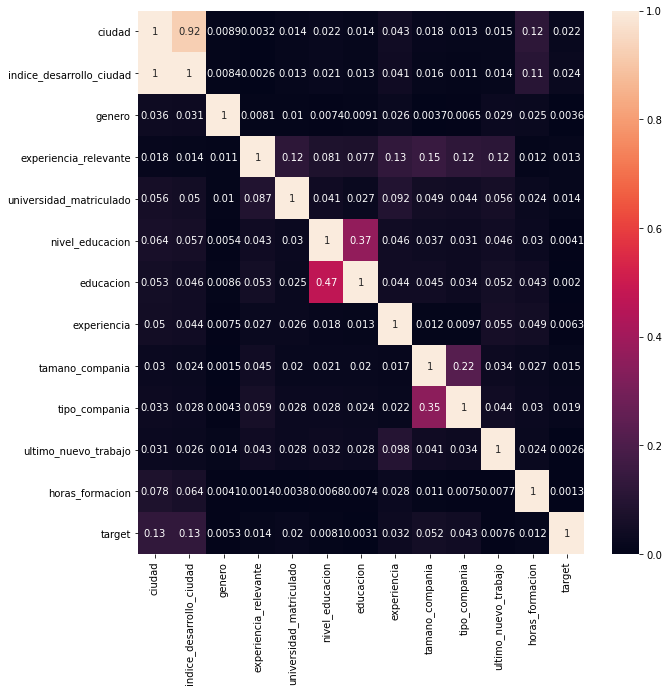

In [19]:
data1 = data.drop(columns=['empleado_id'])
n = data1.shape[1]
corr_matrix1 = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        corr_matrix1[i, j] = theils_u(data[data1.columns[i]], data[data1.columns[j]])
        
df1 = pd.DataFrame(corr_matrix1, columns=data1.columns)
plt.figure(figsize=(10,10))
sns.heatmap(df1, vmin=0, vmax=1, annot=True, yticklabels=data1.columns, xticklabels=data1.columns)

In [20]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [21]:
correlation_ratio(data['ciudad'], data['indice_desarrollo_ciudad'])

1.0000000000000002

In [22]:
correlation_ratio(data['target'], data['indice_desarrollo_ciudad'])

0.3416650855452297

In [23]:
correlation_ratio(data['target'], data['horas_formacion'])

0.021577249713613234

In [24]:
data.corr()

,empleado_id,indice_desarrollo_ciudad,horas_formacion,target
empleado_id,1.000000,-0.040455,0.000998,0.049475
indice_desarrollo_ciudad,-0.040455,1.000000,0.001920,-0.341665
horas_formacion,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


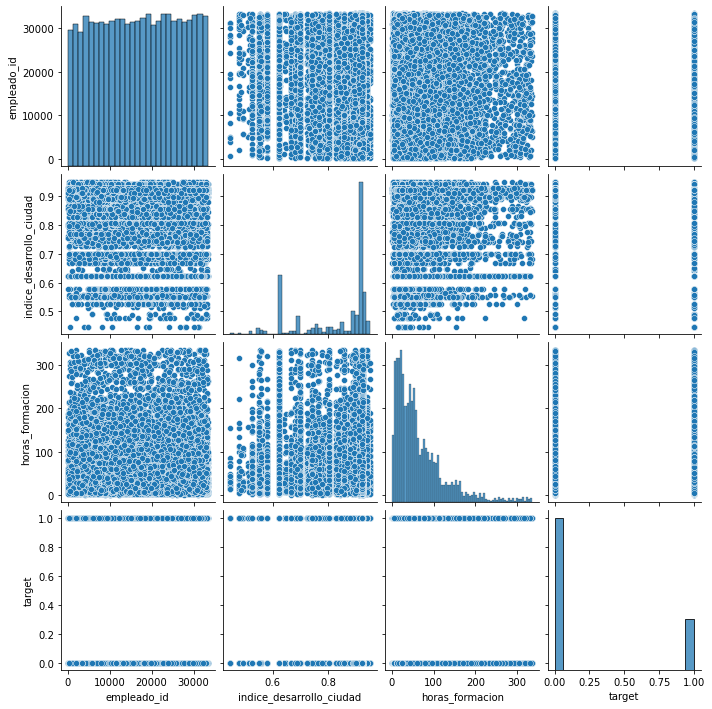

In [25]:
sns.pairplot(data)

In [26]:
data['experiencia_str'] = data.experiencia.apply(lambda x: str(x))

In [27]:
np.unique(data['experiencia_str'])

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '3', '4', '5', '6', '7', '8', '9', '<1', '>20', 'nan'],
      dtype=object)

In [28]:
def buckets_experiencia(x):
    try:
        x = int(x)
    
#         if x <= 2:
#             return '<2'
#         if x <= 5: 
#             return '<5'
        if x <= 10:
            return '<10'
#         elif x >= 15:
#             return '<15'
        elif x <= 20:
            return '<20'
    except:
        if x == 'nan':
            return np.nan
        return x
        

In [29]:
data['experiencia_str'] = data.experiencia.apply(buckets_experiencia)

In [30]:
data.experiencia_str

0        >20
1        <20
2        <10
3         <1
4        >20
        ... 
19153    <20
19154    <20
19155    >20
19156     <1
19157    <10
Name: experiencia_str, Length: 19158, dtype: object

<AxesSubplot:>

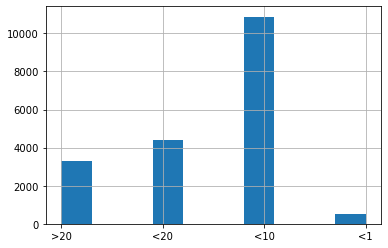

In [31]:
data.experiencia_str.hist()

In [32]:
cramers_v(data['target'], data['experiencia_str'])

0.16364452115682432

In [33]:
data['t_c'] = data.tipo_compania.apply(lambda x: str(x))
np.unique(data['t_c'])

array(['Early Stage Startup', 'Funded Startup', 'NGO', 'Other',
       'Public Sector', 'Pvt Ltd', 'nan'], dtype=object)

In [34]:
def buckets_tipo_compania(x):
    if x != 'nan' and x != 'Pvt Ltd':
        return 'Otros'
    elif x == 'nan':
        return np.nan
    return x
        

In [35]:
data['t_c'] = data['t_c'].apply(buckets_tipo_compania)

In [36]:
data['t_c']

0            NaN
1        Pvt Ltd
2            NaN
3        Pvt Ltd
4          Otros
          ...   
19153        NaN
19154        NaN
19155    Pvt Ltd
19156    Pvt Ltd
19157        NaN
Name: t_c, Length: 19158, dtype: object

In [37]:
cramers_v(data['t_c'], data['target'])

0.010129522319859611

<AxesSubplot:>

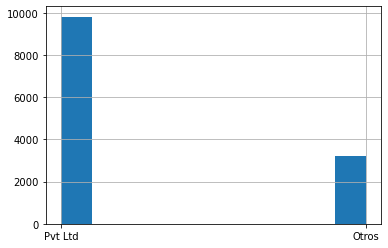

In [38]:
data['t_c'].hist()

In [39]:
data['tam_c'] = data.tamano_compania.apply(lambda x: str(x))
# print(data['tam_c'].value_counts())
# np.unique(data['tam_c'])

In [40]:
data['tam_c'] = data.tamano_compania.apply(lambda x: str(x))
def buckets_tam_compania(x):
    tam_c = {'<10': 'XS', '10/49': 'S',
             '50-99': 'M', '100-500': 'M', 
             '500-999': 'M', '1000-4999': 'L', 
             '5000-9999': 'XL', '10000+': 'XL'}
    
    if x != 'nan':
        return tam_c[x]
    else:
        return np.nan
    

data['tam_c'] = data['tam_c'].apply(buckets_tam_compania)
print(cramers_v(data['tamano_compania'], data['target']))

0.053989227373892335


<AxesSubplot:>

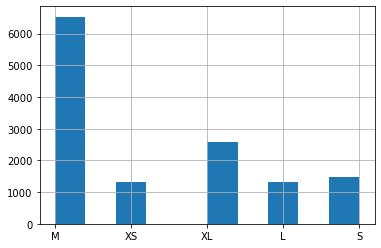

In [41]:
data['tam_c'].hist()

<AxesSubplot:>

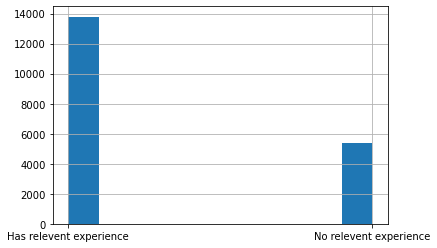

In [42]:
data['experiencia_relevante'].hist()

In [43]:
data[(data['experiencia_relevante'] == 'Has relevant experience') and (data['experiencia_str'] == '<20')]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [44]:
data[data['experiencia_relevante'] == 'Has relevent experience'].head()

,empleado_id,ciudad,indice_desarrollo_ciudad,genero,experiencia_relevante,universidad_matriculado,nivel_educacion,educacion,experiencia,tamano_compania,tipo_compania,ultimo_nuevo_trabajo,horas_formacion,target,experiencia_str,t_c,tam_c
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,>20,NaN,NaN
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,>20,Otros,M
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0,<20,NaN,NaN
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0,<10,Otros,M
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0,<20,Pvt Ltd,XS


In [45]:
data[data['experiencia_str'] == '<20'].head()

,empleado_id,ciudad,indice_desarrollo_ciudad,genero,experiencia_relevante,universidad_matriculado,nivel_educacion,educacion,experiencia,tamano_compania,tipo_compania,ultimo_nuevo_trabajo,horas_formacion,target,experiencia_str,t_c,tam_c
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,<20,Pvt Ltd,M
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0,<20,NaN,NaN
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0,<20,Pvt Ltd,XS
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0,<20,Pvt Ltd,XL
15,6588,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,10/49,Pvt Ltd,>4,18,0.0,<20,Pvt Ltd,S


In [46]:
len(data[(data['experiencia_str'] == '<20') & (data['experiencia_relevante'] == 'Has relevent experience')])

3846

In [47]:
np.unique(data['experiencia_str'].apply(lambda x: str(x)))

array(['<1', '<10', '<20', '>20', 'nan'], dtype=object)

In [48]:
def bucket_y_ye(exp, rel_exp):
    
    if str(exp) != 'nan':
        if rel_exp == 'Has relevent experience':
            return str(exp) + '_rel'
        else:
            return str(exp) + '_norel'
    else: 
        return np.nan
    
    return exp

In [49]:
data['exp_rel-exp'] = data.apply(lambda x: bucket_y_ye(x.experiencia_str, x.experiencia_relevante), axis=1)

In [50]:
np.unique(data['exp_rel-exp'].apply(lambda x: str(x)))

array(['<10_norel', '<10_rel', '<1_norel', '<1_rel', '<20_norel',
       '<20_rel', '>20_norel', '>20_rel', 'nan'], dtype=object)

<AxesSubplot:>

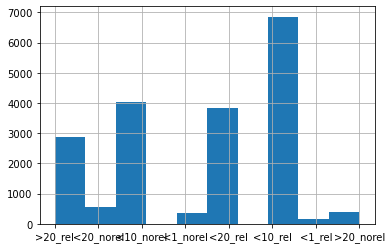

In [51]:
data['exp_rel-exp'].hist()

In [52]:
cramers_v(data['exp_rel-exp'], data['target'])

0.18604545338685705

In [53]:
data['gen'] = data.genero.apply(lambda x: 'Female' if str(x) == 'nan' else x)

<AxesSubplot:>

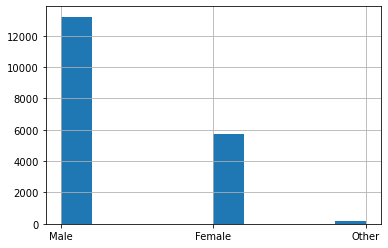

In [54]:
data['gen'].hist()

In [55]:
cramers_v(data.gen, data.target)

0.07402213026028438

<AxesSubplot:>

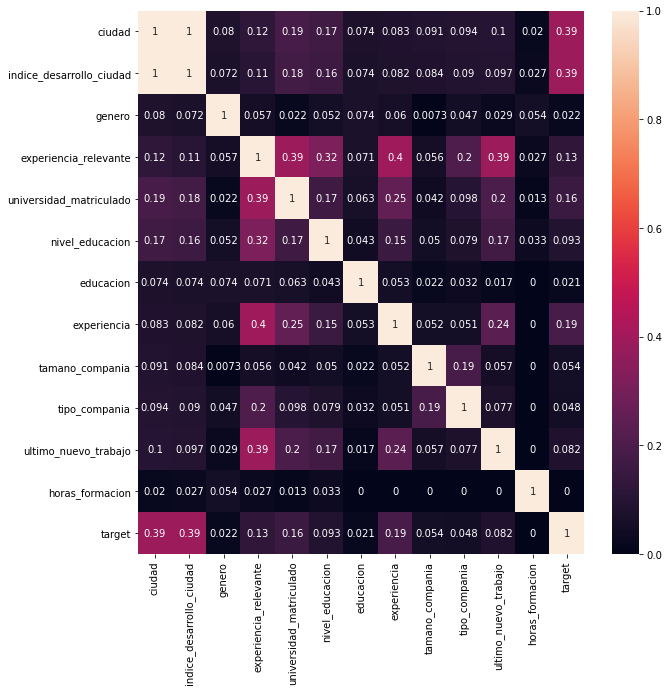

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(df, vmin=0, vmax=1, annot=True, yticklabels=data1.columns, xticklabels=data1.columns)

vamos
vamos
Feature ranking:
1. feature 0 (ciudad): 1227.794152
2. feature 13 (exp_rel-exp): 807.267817
3. feature 2 (experiencia_relevante): 163.755148
4. feature 4 (nivel_educacion): 135.684527
5. feature 10 (experiencia_str): 133.712616
6. feature 3 (universidad_matriculado): 118.802049
7. feature 12 (tam_c): 42.240413
8. feature 7 (tamano_compania): 25.929702
9. feature 14 (gen): 21.501902
10. feature 9 (ultimo_nuevo_trabajo): 21.460701
11. feature 8 (tipo_compania): 18.804182
12. feature 11 (t_c): 8.872551
13. feature 6 (experiencia): 6.114468
14. feature 5 (educacion): 0.356147
15. feature 1 (genero): 0.069365


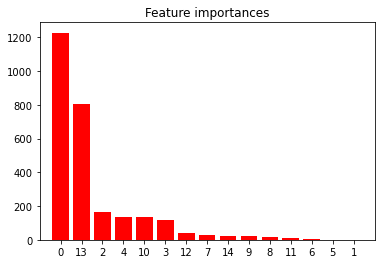

In [57]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

X1 = data.drop(columns=['empleado_id', 'target'])
y = data['target']

num_cols = ['indice_desarrollo_ciudad', 'horas_formacion']
num_data = X1[num_cols]
cat_data = X1.drop(columns=num_cols)

imputer = SimpleImputer(strategy='median')
numeric_set_1 = pd.DataFrame(imputer.fit_transform(num_data), columns=num_data.columns)

imputer_cat = SimpleImputer(strategy='most_frequent')
cat_set_1 = pd.DataFrame(imputer_cat.fit_transform(cat_data), columns=cat_data.columns)
# cat_set_1 = imputer_cat.fit_transform(dat_data.to_numpy().reshape(-1,1))

print('vamos')
X = pd.concat([numeric_set_1, cat_set_1], axis=1)
X = cat_set_1
print('vamos')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
# for i in range(len(fs.scores_)):
# 	print('Feature %d: %f' % (i, fs.scores_[i]))
# # plot the scores
# plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
# plt.show()


columns = X.columns.to_list()
importances = fs.scores_
# std = np.std(importances)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s): %f" % (f + 1, indices[f], columns[indices[f]], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

<AxesSubplot:>

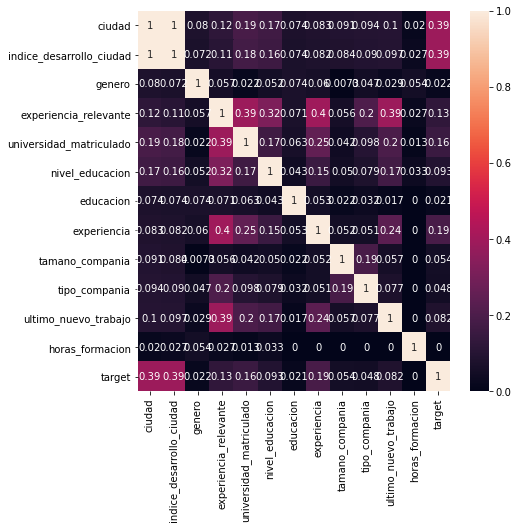

In [58]:
plt.figure(figsize=(7,7))
sns.heatmap(df, vmin=0, vmax=1, annot=True, yticklabels=data1.columns, xticklabels=data1.columns)

In [59]:
std

NameError: name 'std' is not defined

In [70]:
X_train_enc

array([[116.,   1.,   0., ...,   1.,   5.,   1.],
       [ 46.,   1.,   0., ...,   1.,   1.,   0.],
       [ 99.,   1.,   0., ...,   1.,   5.,   1.],
       ...,
       [ 89.,   1.,   1., ...,   1.,   4.,   1.],
       [ 91.,   1.,   0., ...,   1.,   1.,   1.],
       [ 51.,   1.,   0., ...,   1.,   5.,   1.]])

-----------

Una vez preparados los datos, vamos a probar algunos de los modelos

* Logistic regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
LR = LogisticRegression(random_state=0, max_iter=500)

In [73]:
LR.fit(X=X_train_enc, y=y_train_enc)

LogisticRegression(max_iter=500, random_state=0)

In [82]:
print(LR.score(X=X_train_enc, y=y_train_enc))
print(LR.score(X=X_test_enc, y=y_test_enc))

0.748733930658356
0.7545468922979598


In [83]:
y_predict_LR = LR.predict(X_test_enc)

* Extra Trees Classifier

In [84]:
from sklearn.ensemble import ExtraTreesClassifier

In [85]:
ExtTreesClass = ExtraTreesClassifier(n_estimators=100, random_state=123)
ExtTreesClass.fit(X=X_train_enc, y=y_train_enc)

ExtraTreesClassifier(random_state=123)

In [86]:
print(ExtTreesClass.score(X=X_train_enc, y=y_train_enc))
print(ExtTreesClass.score(X=X_test_enc, y=y_test_enc))

0.9579275418776783
0.7317728926142654


In [87]:
y_predict_ExtTreesClass = ExtTreesClass.predict(X_test_enc)

* Support Vector Machine (SVM)

In [88]:
from sklearn import svm

In [89]:
svm = svm.LinearSVC()
svm.fit(X=X_train_enc, y=y_train_enc)

C:\Users\alvar\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [90]:
print(svm.score(X=X_train_enc, y=y_train_enc))
print(svm.score(X=X_test_enc, y=y_test_enc))

0.7490455784962992
0.7540724339712161


In [91]:
y_predict_svm = svm.predict(X_test_enc)

* K-nearest neighbors

In [92]:
from sklearn import neighbors

In [93]:
neigh = neighbors.KNeighborsClassifier(n_neighbors=2)

In [94]:
neigh.fit(X_train_enc, y=y_train_enc)

KNeighborsClassifier(n_neighbors=2)

In [95]:
print(neigh.score(X=X_train_enc, y=y_train_enc))
print(neigh.score(X=X_test_enc, y=y_test_enc))

0.8417608102843787
0.7520164478886604


In [96]:
y_predict_neigh = neigh.predict(X_test_enc)

---------------
Vamos a medir los modelos probados con las métricas  de "Accuracy", "Precision", "f1_score":

In [97]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix, coverage_error

* Logistic regression

In [98]:
LR_f1_score = f1_score(y_predict_LR, y_test_enc, average='macro')
LR_f1_score

0.4624444438601427

In [99]:
LR_accuracy_score = accuracy_score(y_predict_LR, y_test_enc)
LR_accuracy_score

0.7545468922979598

In [100]:
LR_precision_score = precision_score(y_predict_LR, y_test_enc, average='macro')
LR_precision_score

0.5123242455765133

In [101]:
cm_LR = confusion_matrix(y_test_enc, LR.predict(X_test_enc), labels=list(range(2)))

In [102]:
pd.DataFrame(cm_LR, index = list(range(2)), columns = list(range(2)))

,0,1
0,4716,51
1,1501,55


In [103]:
LR_metrics_df = pd.DataFrame([LR_f1_score, LR_accuracy_score, LR_precision_score]).T
LR_metrics_df

,0,1,2
0,0.462444,0.754547,0.512324


* Extra Trees Classifier

In [104]:
ExtTreesClass_f1_score = f1_score(y_predict_ExtTreesClass, y_test_enc, average='macro')
ExtTreesClass_f1_score

0.5922154187616512

In [105]:
ExtTreesClass_accuracy_score = accuracy_score(y_predict_ExtTreesClass, y_test_enc)
ExtTreesClass_accuracy_score

0.7317728926142654

In [106]:
ExtTreesClass_precision_score = precision_score(y_predict_ExtTreesClass, y_test_enc, average='macro')
ExtTreesClass_precision_score

0.5857480439374599

In [107]:
cm_ExtTreesClass = confusion_matrix(y_test_enc, ExtTreesClass.predict(X_test_enc), labels=list(range(2)))

In [108]:
pd.DataFrame(cm_ExtTreesClass, index = list(range(2)), columns = list(range(2)))

,0,1
0,4163,604
1,1092,464


In [109]:
ExtTreesClass_metrics_df = pd.DataFrame([ExtTreesClass_f1_score, ExtTreesClass_accuracy_score, ExtTreesClass_precision_score]).T
ExtTreesClass_metrics_df

,0,1,2
0,0.592215,0.731773,0.585748


* Support Vector Machine (SVM)

In [110]:
svm_f1_score = f1_score(y_predict_svm, y_test_enc, average='macro')
svm_f1_score

0.4311556976650878

In [111]:
svm_accuracy_score = accuracy_score(y_predict_svm, y_test_enc)
svm_accuracy_score

0.7540724339712161

In [112]:
svm_precision_score = precision_score(y_predict_svm, y_test_enc, average='macro')
svm_precision_score

0.5005377857517649

In [113]:
cm_svm = confusion_matrix(y_test_enc, svm.predict(X_test_enc), labels=list(range(2)))

In [114]:
pd.DataFrame(cm_svm, index = list(range(2)), columns = list(range(2)))

,0,1
0,4766,1
1,1554,2


In [115]:
svm_metrics_df = pd.DataFrame([svm_f1_score, svm_accuracy_score, svm_precision_score]).T
svm_metrics_df

,0,1,2
0,0.431156,0.754072,0.500538


* K-nearest neighbors

In [116]:
neigh_f1_score = f1_score(y_predict_neigh, y_test_enc, average='macro')
neigh_f1_score

0.5654577425898103

In [117]:
neigh_accuracy_score = accuracy_score(y_predict_neigh, y_test_enc)
neigh_accuracy_score

0.7520164478886604

In [118]:
neigh_precision_score = precision_score(y_predict_neigh, y_test_enc, average='macro')
neigh_precision_score

0.5649747379558372

In [119]:
cm_neigh = confusion_matrix(y_test_enc, neigh.predict(X_test_enc), labels=list(range(2)))

In [120]:
pd.DataFrame(cm_neigh, index = list(range(2)), columns = list(range(2)))

,0,1
0,4449,318
1,1250,306


In [121]:
neigh_metrics_df = pd.DataFrame([neigh_f1_score, neigh_accuracy_score, neigh_precision_score]).T
neigh_metrics_df

,0,1,2
0,0.565458,0.752016,0.564975


Comparativa de los modelos entrenados

In [122]:
models = ['Logistic Regression', 'Extra Trees Classifier', 'Support Vector Machine', 'K-nearest neighbors']
metrics = ['f1_score', 'Accuracy', 'Precision']

In [123]:
all_metrics_df = LR_metrics_df.append(ExtTreesClass_metrics_df)
all_metrics_df = all_metrics_df.append(svm_metrics_df)
all_metrics_df = all_metrics_df.append(neigh_metrics_df)
all_metrics_df = all_metrics_df.set_axis(models, axis=0)
all_metrics_df = all_metrics_df.set_axis(metrics, axis=1)
all_metrics_df


,f1_score,Accuracy,Precision
Logistic Regression,0.462444,0.754547,0.512324
Extra Trees Classifier,0.592215,0.731773,0.585748
Support Vector Machine,0.431156,0.754072,0.500538
K-nearest neighbors,0.565458,0.752016,0.564975
